In [1]:
import matplotlib.pyplot as plt
import odrive
import time

In [2]:
# TODO: A nice little explanation of what this Jupyter file does. Tell the user what they need to do to use this

# TODO: Check if this works for MacOS and Linux as well

# TODO: Add realtime measurements, the script is probably quite a bit slower than t_delay

# TODO: Add setting where x-axis is within some limit

In [3]:
# Helper functions, do not edit

# Returns interface to ODrive
def find_ODrive():
    odrv = odrive.find_any()
    if odrv:
        print("ODrive found")
    return odrv

# Construct cum_data dictionary
def init_data_dict(cmds: list[str]) -> dict[str, list[None]]:
    
    out_dict: dict[str, list[None]] = {key: [] for key in cmds}
    out_dict['time'] = []
    
    return out_dict


In [4]:
# User defined functions


"""
Send a list of commands to the ODrive, most which return
a plottable value. You must define what to do with your commands
here

Arguments:
    odrv : ODrive interface
    cmds : List of commands as strings 
Returns:
    data: Dictionary of output data. Keys are cmds, values are the data received (usually float or int)
""" 
def query_ODrive(odrv, cmds: list[str]) -> dict[str, None]:
    out: dict[str, None] = {}
    
    for c in cmds:
        if c == 'odrv.dodo.Ialpha':
            out['odrv.dodo.Ialpha'] = odrv.dodo.Ialpha
        elif c == 'odrv.dodo.Ibeta':
            out['odrv.dodo.Ibeta'] = odrv.dodo.Ibeta
        elif c == 'odrv.axis0.motor.current_control.Ialpha_measured':
            out['odrv.axis0.motor.current_control.Ialpha_measured'] = odrv.axis0.motor.current_control.Ialpha_measured
        elif c == 'odrv.axis0.motor.current_control.Ibeta_measured':
            out['odrv.axis0.motor.current_control.Ibeta_measured'] = odrv.axis0.motor.current_control.Ibeta_measured
        elif c == 'odrv.axis0.motor.current_meas_phA':
            out['odrv.axis0.motor.current_meas_phA'] = odrv.axis0.motor.current_meas_phA
        elif c == 'odrv.axis0.motor.current_meas_phB':
            out['odrv.axis0.motor.current_meas_phB'] = odrv.axis0.motor.current_meas_phB
        else:
            raise Exception('Unexpected command queried: {}. User must add these manually to query_ODrive function'.format(c))
    
        
    return out

In [5]:
# Global variables

# ODrive interface
odrv = find_ODrive()

ODrive found


In [6]:
# Test ODrive commands

#print(odrv.axis0.motor.current_control)
#print(odrv.axis0.motor)

In [9]:
# User variables

# Commands to send to ODrive. Best to keep them as same name as actual command from ODrive API.
cmds: list[str] = [
    'odrv.axis0.motor.current_meas_phA',
    'odrv.axis0.motor.current_meas_phB',
]

# Cumulative data from ODrive (i.e. data from all queries)
# Also keeps a list of the relative time stamps of each query to the ODrive
cum_data: dict[str, None] = init_data_dict(cmds)

# Time delay between ODrive readings in seconds. Used for x-axis of plot as well
t_delay = 0.1
time_passed = 0

<IPython.core.display.Javascript object>


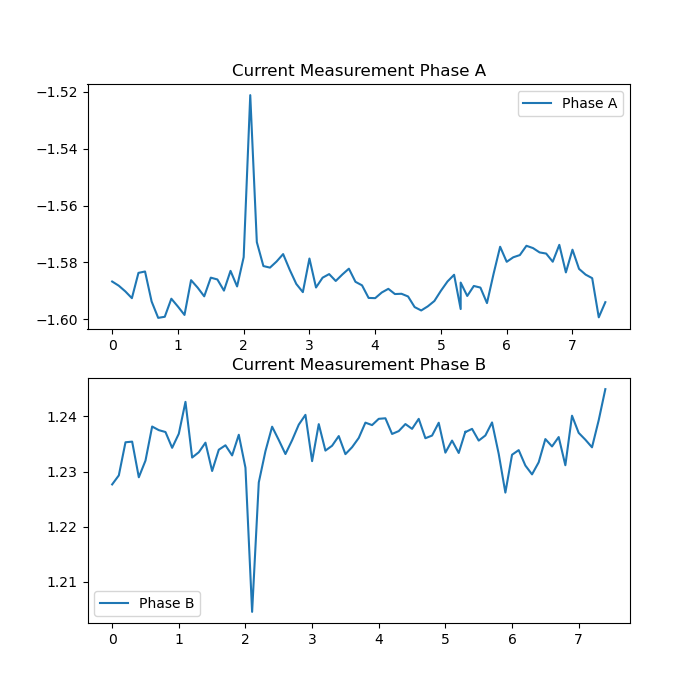

KeyboardInterrupt: 

In [11]:
%matplotlib notebook

# User variables

# Reset data when cell is run, or continue with previous data.
reset_data = False

# Add axes here if you want more plots, ex. fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
# figsize changes size of plot, adjust to your screen size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))
# Change figure size, use this to fit to your screen
fig.figsize = [8, 8]


# End of user variables

# Do not edit these variables
plt.ion()
fig.show()
fig.canvas.draw()

if reset_data:
    time_passed = 0
    cum_data = {key: [] for key in cum_data}

while True:
    
    # Query ODrive for data, and add to dictionary
    cum_data['time'].append(time_passed)
    data = query_ODrive(odrv, cmds)
    for key, val in data.items():    
        cum_data[key].append(val)
    

    # Test if cum_data looks correct
    #print(cum_data)
    
    # Settings for the first plot
    
    ax1.clear()
    ax1.set_title("Current Measurement Phase A")
    ax1.plot(cum_data['time'], cum_data['odrv.axis0.motor.current_meas_phA'], label='Phase A')
    ax1.legend()
    fig.canvas.draw()
    
    # Settings for the second plot
    
    ax2.clear()
    ax2.set_title("Current Measurement Phase B")
    ax2.plot(cum_data['time'], cum_data['odrv.axis0.motor.current_meas_phB'], label='Phase B')
    ax2.legend()
    fig.canvas.draw()
    
    # Settings for the second plot
    
    #
    #plt.plot([cum_data['time'], cum_data['odrv.dodo.Ialpha']])
    #fig.canvas.draw()
    #fig.canvas.start_event_loop(1/t_delay)
    #plt.show()
    
    # Sleep and increment time passed
    time.sleep(t_delay)
    time_passed += t_delay
    
    

In [ ]:
# TODO: Add function that saves the data from cum_data to a json or txt file

In [ ]:
# TODO: Add feature that prints cum_data into a nice dataframe to look at